In [29]:
import csv
import os

from matplotlib import pyplot as plt


def get_mean(data, index):
    mean = 0
    counter = 0
    for row in data:
        if row[index].isnumeric():
            mean += float(row[index])
            counter += 1

    return mean / counter


def fill(data, index, mean):
    for row in data:
        if row[index] == '':
            row[index] = mean


def load_data(file_name, input_variable_name_list, output_variable_name):
    print(file_name)
    data = []
    data_names = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1
    selected_variable1 = data_names.index(input_variable_name_list[0])
    selected_variable2 = data_names.index(input_variable_name_list[1])
    if file_name == 'C:\Facultate\Materii\AI\Laboratoare\laborator5\data\\v3_world-happiness-report-2017.csv':
        m1 = get_mean(data, selected_variable1)
        m2 = get_mean(data, selected_variable2)
        fill(data, selected_variable1, m1)
        fill(data, selected_variable2, m2)
    input_list = [[float(data[i][selected_variable1]), float(data[i][selected_variable2])] for i in range(len(data))]
    selected_output = data_names.index(output_variable_name)
    output_list = [float(data[i][selected_output]) for i in range(len(data))]

    return input_list, output_list

In [30]:
def plot_histogram(data, variable_name):
    _ = plt.hist(data, 10)
    plt.title("Histogram of " + variable_name)
    plt.show()

C:\Facultate\Materii\AI\Laboratoare\laborator6\data\world-happiness-report-2017.csv
in:   [[1.61646318435669, 0.635422587394714], [1.48238301277161, 0.626006722450256], [1.480633020401, 0.627162635326385], [1.56497955322266, 0.620070576667786], [1.44357192516327, 0.617950856685638]]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


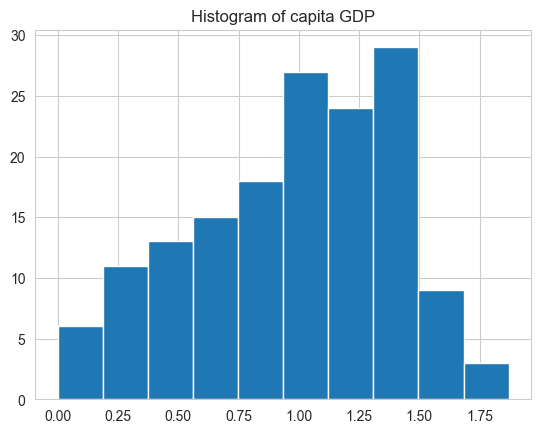

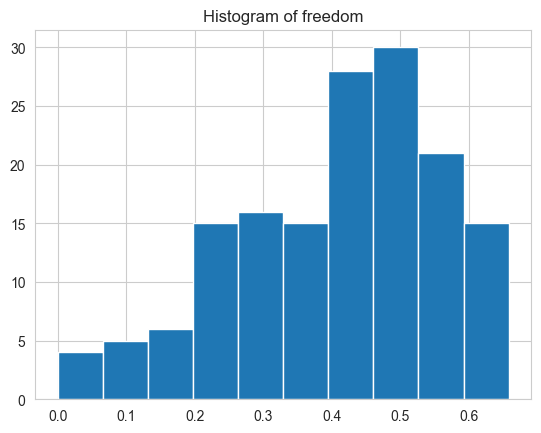

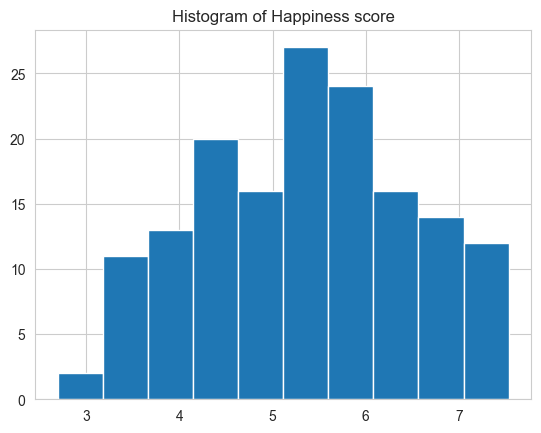

In [31]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = load_data(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

f1 = [ex[0] for ex in inputs]
f2 = [ex[1] for ex in inputs]
plot_histogram(f1, 'capita GDP')
plot_histogram(f2, 'freedom')
plot_histogram(outputs, 'Happiness score')

In [32]:
def plot3Ddata(x1_train, x2_train, y_train, x1_model=None, x2_model=None, y_model=None, x1_test=None, x2_test=None,
               y_test=None,
               title=None):
    ax = plt.axes(projection='3d')
    if x1_train:
        ax.scatter(x1_train, x2_train, y_train, c='r', marker='o', label='train data', s=10)
    if x1_model:
        ax.scatter(x1_model, x2_model, y_model, c='g', marker='_', label='learnt model')
    if x1_test:
        ax.scatter(x1_test, x2_test, y_test, c='purple', marker='^', label='test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

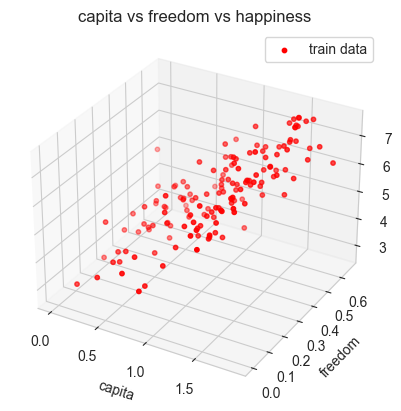

In [33]:
plot3Ddata(f1, f2, outputs, [], [], [], [], [], [], "capita vs freedom vs happiness")

In [34]:
def normalisation(train_data, test_data):
    def normalize_feature(data_arg):
        minimum = min(data_arg)
        maximum = max(data_arg)
        for i in range(len(data_arg)):
            data_arg[i] = (data_arg[i] - minimum) / (maximum - minimum)

    def normalize(train_data_arg):
        new_train_data = [[] for _ in range(len(train_data_arg))]
        for i in range(len(train_data_arg[0])):
            aux_list = [train_data_arg[r][i] for r in range(len(train_data_arg))]
            normalize_feature(aux_list)
            for t in range(len(train_data_arg)):
                new_train_data[t].append(aux_list[t])

        return new_train_data

    if not isinstance(train_data[0], list):
        train_data = [[d] for d in train_data]
        test_data = [[d] for d in test_data]

        normalised_train_data = normalize(train_data)
        normalised_test_data = normalize(test_data)

        normalised_train_data = [d[0] for d in normalised_train_data]
        normalised_test_data = [d[0] for d in normalised_test_data]
    else:
        normalised_train_data = normalize(train_data)
        normalised_test_data = normalize(test_data)

    return normalised_train_data, normalised_test_data

[[0.7400167079586476, 0.6210133851522797], [0.273222819936379, 0.59250827177419], [0.5637791592748925, 0.7280633635107462], [0.8294330254277003, 0.7458710852821281], [0.6509013504006852, 0.6942721925317697], [0.31627875782508424, 0.3789809780886279], [0.19710960917905387, 0.8839271323248442], [0.3525383735038022, 0.022781444343681994], [0.7573985287820378, 0.7681375966851333], [0.618395513447929, 0.3787666001423456], [0.7030144419975116, 0.7572598740625777], [0.4782276883118197, 0.18682115536809699], [0.19703710925552073, 0.04613736272567407], [0.5325053590363156, 0.5795661370678714], [0.012103698746648187, 0.9147408720722815], [0.5398057875043312, 0.8525854840549901], [0.4154198145429325, 0.12387331598992371], [0.19623545222364924, 0.7816074135380013], [0.6028915218898463, 0.881430930911897], [0.2804806819803831, 0.7163959965880631], [0.8365449317917664, 0.9420005107039576], [0.5297362474766, 0.6356581833065004], [0.6851622876776561, 0.5678448474136114], [0.20090518966273052, 0.511029

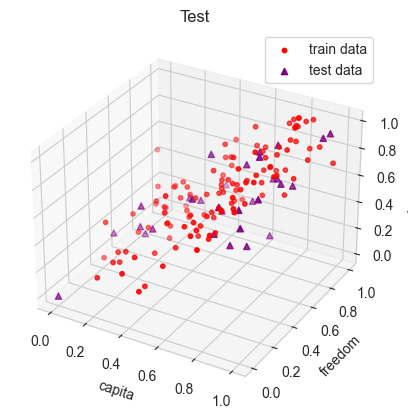

In [35]:
import random

indexes = [i for i in range(len(inputs))]
train_sample = random.sample(indexes, k=int(0.8 * len(inputs)))
test_sample = [i for i in range(len(inputs)) if not i in train_sample]

train_input_data = [inputs[i] for i in train_sample]
train_output_data = [outputs[i] for i in train_sample]
test_input_data = [inputs[i] for i in test_sample]
test_output_data = [outputs[i] for i in test_sample]

train_input_data, test_input_data = normalisation(train_input_data, test_input_data)
train_output_data, test_output_data = normalisation(train_output_data, test_output_data)
print(train_input_data)

f1_train = [t_data[0] for t_data in train_input_data]
f2_train = [t_data[1] for t_data in train_input_data]

f1_test = [t_test[0] for t_test in test_input_data]
f2_test = [t_test[1] for t_test in test_input_data]

plot3Ddata(f1_train, f2_train, train_output_data, [], [], [], f1_test, f2_test, test_output_data, "Test")

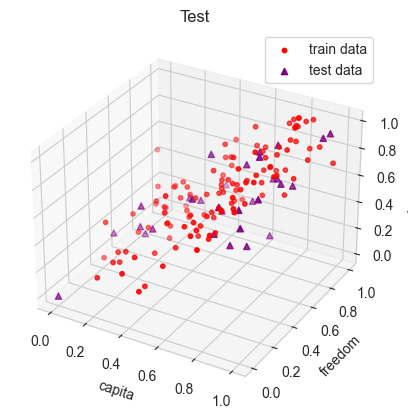

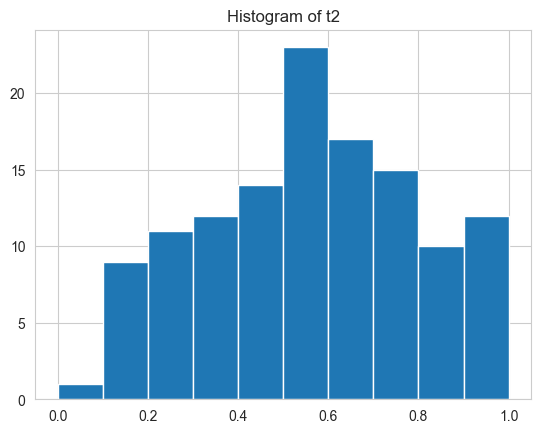

In [36]:
plot3Ddata(f1_train, f2_train, train_output_data, [], [], [], f1_test, f2_test, test_output_data, "Test")
plot_histogram(train_output_data, "t2")

In [37]:
from random import shuffle
def sign(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

class MyGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficients = []
        self.delta = 1

    def fit(self, x, y, learning_rate=0.0001, no_epochs=10000, batch_size=32):
        self.coefficients = [0.0 for _ in range(len(x[0]) + 1)]  # coefficients initialization
        n_samples = len(x)

        for epoch in range(no_epochs):
            for i in range(0, n_samples, batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                gradients = self.compute_gradients(x_batch, y_batch)

                for j in range(len(x[0])):
                    self.coefficients[j] -= learning_rate * gradients[j]
                self.coefficients[-1] -= learning_rate * gradients[-1]

        self.intercept_ = self.coefficients[-1]
        self.coefficients = self.coefficients[:-1]

    def eval(self, xi):
        yi = self.coefficients[-1]
        for j in range(len(xi)):
            yi += self.coefficients[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

    def compute_gradients(self, x, y):
        gradients = [0 for _ in range(len(x[0]) + 1)]
        for i in range(len(x)):
            y_computed = self.eval(x[i])
            crt_error = y_computed - y[i]
            for j in range(len(x[0])):
                gradients[j] += crt_error * x[i][j]
            gradients[-1] += crt_error
        for j in range(len(gradients)):
            gradients[j] /= len(x)
        return gradients
    
    def compute_gradients2(self, x, y):
        gradients = [0 for _ in range(len(x[0]) + 1)]
    
        for i in range(len(x)):
            y_computed = self.eval(x[i])
            crt_error = y_computed - y[i]
    
            if abs(crt_error) <= self.delta:
                for j in range(len(x[0])):
                    gradients[j] += crt_error * crt_error * x[i][j] * 1 / 2
                gradients[-1] += crt_error * crt_error * 1 / 2
            else:
                for j in range(len(x[0])):
                    gradients[j] += self.delta * abs(crt_error) - 0.5 * self.delta * self.delta
                gradients[-1] += self.delta * abs(crt_error) - 0.5 * self.delta * self.delta
    
        for j in range(len(gradients)):
            gradients[j] /= len(x)
    
        return gradients
    
    def compute_gradients3(self, x, y):
        gradients = [0 for _ in range(len(x[0]) + 1)]
    
        for i in range(len(x)):
            y_computed = self.eval(x[i])
            crt_error = y_computed - y[i]
    
            for j in range(len(x[0])):
                gradients[j] += abs(crt_error) * x[i][j]
            gradients[-1] += abs(crt_error)
    
        for j in range(len(gradients)):
            gradients[j] /= len(x)
    
        return gradients

In [38]:
regressor = MyGDRegression()

regressor.fit(train_input_data, train_output_data)

predicted = regressor.predict(test_input_data)
print(predicted)

[0.7306624789020282, 0.7162456630634878, 0.6435698992629292, 0.6021633801109313, 0.6143346833572139, 0.5377973255916191, 0.5913970032673379, 0.5130830486866067, 0.5851616739636747, 0.6379040985385349, 0.6429413232884551, 0.6628135547371893, 0.5522012201737682, 0.5477070764014825, 0.6483980416575321, 0.49360961175227386, 0.5146190816449184, 0.41180796798399677, 0.6125324769757147, 0.506293444733608, 0.5245993822306695, 0.5389704966037139, 0.5674534502894771, 0.5579576378096658, 0.4271654299464521, 0.5920749630794391, 0.41078082299407614, 0.6361110632618554, 0.37032331931605, 0.4264113290833702, 0.24734874193876022]


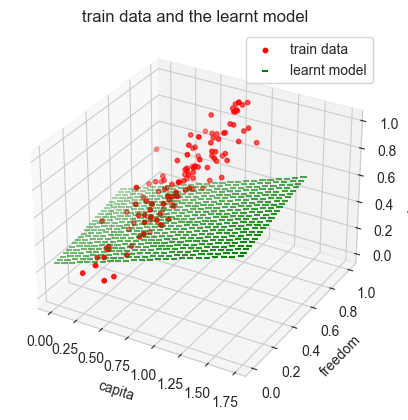

In [39]:
no_of_points = 25
xref = []
val = min(f1)
step = (max(f1) - val) / no_of_points
for i in range(1, no_of_points):
    for j in range(1, no_of_points):
        xref.append(val)
    val += step

xref2 = []
val = min(f2)
step = (max(f2) - val) / no_of_points
for i in range(1, no_of_points):
    aux = val
    for j in range(1, no_of_points):
        xref2.append(aux)
        aux += step

yref = [regressor.eval([el1, el2]) for el1, el2 in zip(xref, xref2)]
plot3Ddata(f1_train, f2_train, train_output_data, xref, xref2, yref, [], [], [], 'train data and the learnt model')

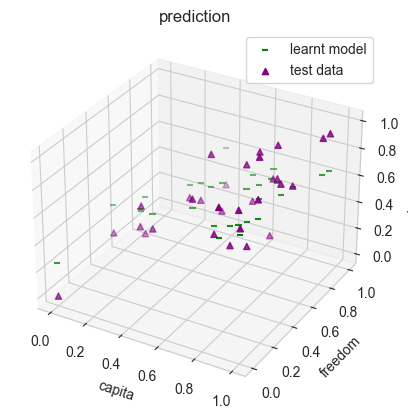

In [40]:
computed_test_outputs = regressor.predict(test_input_data)

plot3Ddata([], [], [], f1_test, f2_test, computed_test_outputs, f1_test, f2_test, test_output_data, "prediction")

In [41]:
error = 0.0
for t1, t2 in zip(computed_test_outputs, test_output_data):
    error += (t1 - t2) ** 2
error = error / len(test_output_data)
print('prediction error (manual): ', error)

error2 = 0.0
for t1, t2 in zip(computed_test_outputs, test_output_data):
    error2 += abs(t1 - t2)
error2 = error2 / len(test_output_data)
print('predicition error2 (manual with MAE)', error2)

prediction error (manual):  0.03873567811912697
predicition error2 (manual with MAE) 0.1707305358906113


In [42]:
n_folds = 3
n_sample = len(inputs)
fold_size = n_sample // n_folds

indexes = [i for i in range(n_sample)]
shuffle(indexes)

for i in range(n_folds):
    validation_indices = indexes[i * fold_size: (i + 1) * fold_size]
    train_indices = [idx for idx in indexes if idx not in validation_indices]
    for j in range(i * fold_size):
        train_indices.append(j)
    for j in range((i + 1) * fold_size, n_sample):
        train_indices.append(j)
    
    train_inputs_v = [inputs[i] for i in train_indices]
    train_outputs_v = [outputs[i] for i in train_indices]

    validation_inputs_v = [inputs[i] for i in validation_indices]
    validation_outputs_v = [outputs[i] for i in validation_indices]
        
    model = MyGDRegression()
    model.fit(train_inputs_v, train_outputs_v)
    prediction = model.predict(validation_inputs_v)
    
    error = 0.0
    for t1, t2 in zip(prediction, validation_outputs_v):
        error += (t1 - t2) ** 2
    error = error / len(validation_outputs_v)
    print('prediction error (manual): ', error)
    
    error2 = 0.0
    for t1, t2 in zip(prediction, validation_outputs_v):
        error2 += abs(t1 - t2)
    error2 = error2 / len(validation_outputs_v)
    print('predicition error2 (manual with MAE)', error2)

prediction error (manual):  2.9627113511564573
predicition error2 (manual with MAE) 1.6182984190911691
prediction error (manual):  2.6785672393744893
predicition error2 (manual with MAE) 1.5260321161021122
prediction error (manual):  1.8517353063545021
predicition error2 (manual with MAE) 1.238851888886483
